In [1]:
#Importing the necessary libraries
import matplotlib.pyplot as plt             # to visualize
from tabulate import tabulate               # to print the table
import matplotlib as mat                    # to visualize
import seaborn as sns                       # to visualize
import pandas as pd                         # for data reading
import numpy as np                          # for numerical computation

In [2]:
#Reading the data file
df = pd.read_csv("/content/DS1_C5_S1_EmployeeAttrition_Data_Practice.csv")
df

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,...,OverTime,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41.0,Yes,Travel_Rarely,Sales,1,Life Sciences,1,2,Female,94,...,Yes,3,1,8,0,1,6,4,0,5
1,49.0,No,Travel_Frequently,Research & Development,8,Life Sciences,2,3,Male,61,...,No,4,4,10,3,3,10,7,1,7
2,37.0,Yes,Travel_Rarely,Research & Development,2,Other,4,4,Male,92,...,Yes,3,2,7,3,3,0,0,0,0
3,33.0,No,Travel_Frequently,Research & Development,3,Life Sciences,5,4,Female,56,...,Yes,3,3,8,3,3,8,7,3,0
4,27.0,No,Travel_Rarely,Research & Development,2,Medical,7,1,Male,40,...,No,3,4,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36.0,No,NaN,Research & Development,23,Medical,2061,3,Male,41,...,No,3,3,17,3,3,5,2,0,3
1466,39.0,No,Travel_Rarely,Research & Development,6,Medical,2062,4,Male,42,...,No,3,1,9,5,3,7,7,1,7
1467,27.0,No,Travel_Rarely,Research & Development,4,Life Sciences,2064,2,Male,87,...,Yes,4,2,6,0,3,6,2,0,3
1468,49.0,No,Travel_Frequently,Sales,2,Medical,2065,4,Male,63,...,No,3,4,17,3,2,9,6,0,8


In [7]:
#Task1:
print(df.shape) #returns a tuple with the details number of rows and columns
print(df.columns) # returns array of columns in dataset
df.info()       # returns the information about the dataset
df.isnull().sum()       # isnull returns the True/False dataframe
                            #sum: counts the number of True in columns

(1470, 27)
Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'EducationField', 'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PerformanceRating', 'RelationshipSatisfaction',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1446 non-null   float64
 1   Attrition                 1470 non-null   object 
 2   BusinessTravel            1440 non-null   object 
 3   Department                1466 no

,0
Age,24
Attrition,0
BusinessTravel,30
Department,4
DistanceFromHome,0
EducationField,12
EmployeeNumber,0
EnvironmentSatisfaction,0
Gender,45
HourlyRate,0


In [8]:
#Task2:
# Seprating out the categorical and numerical variables
def seprate_data_types(df):
    categorical = []
    numerical = []
    for column in df.columns:                # looping on the number of columns
        if df[column].nunique() < 100:       # nunique:  returns unique values in the column,
                                            #binary class(category) number of uniques will be 2
                                            #multi class(category) number of uniques will be < 100
                                            #here 100 is the hyperparamter and can be changed
            categorical.append(column)
        else:
            numerical.append(column)

    return categorical, numerical


categorical, numerical = seprate_data_types(df)         # Calling the function

# # Tabulate is a package used to print the list, dict or any data sets in a proper format; in table format
from tabulate import tabulate
table = [categorical, numerical]
print(tabulate({"Categorical":categorical,
                "continuous": numerical}, headers = ["categorical", "numerical"]))
#Interpretation:here employeenumber,monthly income are numerical columns and all the rest columns are categorical

categorical               numerical
------------------------  --------------
Age                       EmployeeNumber
Attrition                 MonthlyIncome
BusinessTravel
Department
DistanceFromHome
EducationField
EnvironmentSatisfaction
Gender
HourlyRate
JobInvolvement
JobRole
JobSatisfaction
MaritalStatus
NumCompaniesWorked
Over18
OverTime
PerformanceRating
RelationshipSatisfaction
TotalWorkingYears
TrainingTimesLastYear
WorkLifeBalance
YearsAtCompany
YearsInCurrentRole
YearsSinceLastPromotion
YearsWithCurrManager


In [9]:
#Task3:
def info_of_cat(col): #, %, {} got formatting
    print(f"Unique values in {col} are: {df[col].unique()}") # unique: returns the unique values in the col
    print(f"Mode of {col} is {df[col].mode()[0]}")  # mode: returns the mode of the column
    print(f"Number of missing values in {col} is {df[col].isnull().sum()}") # isnull().sum() counts the number of null in dataframe


In [14]:
info_of_cat("Age")

Unique values in Age are: [41. 49. 37. 33. 27. 32. 59. 30. 38. 36. 35. 29. 31. 34. 28. 22. 53. 24.
 21. 42. 44. 46. 39. 43. 50. 26. 48. 55. 45. 56. 23. 51. 40. 54. 58. 20.
 25. 19. 57. 52. 47. 18. 60.]
Mode of Age is 34.0
Number of missing values in Age is 0


In [13]:
Age_mode = df.Age.mode()[0]
print(Age_mode)
df["Age"].fillna(Age_mode, inplace = True)

34.0


In [16]:
info_of_cat("Attrition")

Unique values in Attrition are: ['Yes' 'No']
Mode of Attrition is No
Number of missing values in Attrition is 0


In [17]:
info_of_cat("BusinessTravel")

Unique values in BusinessTravel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel' nan]
Mode of BusinessTravel is Travel_Rarely
Number of missing values in BusinessTravel is 30


In [18]:
BusinessTravel_mode = df.BusinessTravel.mode()[0]
print(BusinessTravel_mode)
df["BusinessTravel"].fillna(BusinessTravel_mode, inplace = True)

Travel_Rarely


In [19]:
info_of_cat("BusinessTravel")

Unique values in BusinessTravel are: ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Mode of BusinessTravel is Travel_Rarely
Number of missing values in BusinessTravel is 0


In [20]:
info_of_cat("Department")

Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources' nan]
Mode of Department is Research & Development
Number of missing values in Department is 4


In [21]:
Department_mode = df.Department.mode()[0]
print(Department_mode)
df["Department"].fillna(Department_mode, inplace = True)

Research & Development


In [22]:
info_of_cat("Department")

Unique values in Department are: ['Sales' 'Research & Development' 'Human Resources']
Mode of Department is Research & Development
Number of missing values in Department is 0


In [23]:
info_of_cat("DistanceFromHome")

Unique values in DistanceFromHome are: [ 1  8  2  3 24 23 27 16 15 26 19 21  5 11  9  7  6 10  4 25 12 18 29 22
 14 20 28 17 13]
Mode of DistanceFromHome is 2
Number of missing values in DistanceFromHome is 0


In [24]:
info_of_cat("EducationField")

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' nan 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 12


In [25]:
EducationField_mode = df.EducationField.mode()[0]
print(EducationField_mode)
df["EducationField"].fillna(EducationField_mode, inplace = True)

Life Sciences


In [26]:
info_of_cat("EducationField")

Unique values in EducationField are: ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Mode of EducationField is Life Sciences
Number of missing values in EducationField is 0


In [27]:
info_of_cat("EnvironmentSatisfaction")

Unique values in EnvironmentSatisfaction are: [2 3 4 1]
Mode of EnvironmentSatisfaction is 3
Number of missing values in EnvironmentSatisfaction is 0


In [29]:
info_of_cat("Gender")

Unique values in Gender are: ['Female' 'Male' nan]
Mode of Gender is Male
Number of missing values in Gender is 45


In [30]:
Gender_mode = df.Gender.mode()[0]
print(Gender_mode)
df["Gender"].fillna(Gender_mode, inplace = True)

Male


In [31]:
info_of_cat("Gender")

Unique values in Gender are: ['Female' 'Male']
Mode of Gender is Male
Number of missing values in Gender is 0


In [32]:
info_of_cat("HourlyRate")

Unique values in HourlyRate are: [ 94  61  92  56  40  79  81  67  44  84  49  31  93  50  51  80  96  78
  45  82  53  83  58  72  48  42  41  86  97  75  33  37  73  98  36  47
  71  30  43  99  59  95  57  76  87  66  55  32  52  70  62  64  63  60
 100  46  39  77  35  91  54  34  90  65  88  85  89  68  69  74  38]
Mode of HourlyRate is 66
Number of missing values in HourlyRate is 0


In [33]:
info_of_cat("JobInvolvement")

Unique values in JobInvolvement are: [3 2 4 1]
Mode of JobInvolvement is 3
Number of missing values in JobInvolvement is 0


In [34]:
info_of_cat("JobRole")

Unique values in JobRole are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' nan 'Human Resources']
Mode of JobRole is Sales Executive
Number of missing values in JobRole is 10


In [35]:
JobRole_mode = df.JobRole.mode()[0]
print(JobRole_mode)
df["JobRole"].fillna(JobRole_mode, inplace = True)

Sales Executive


In [36]:
info_of_cat("JobRole")

Unique values in JobRole are: ['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
Mode of JobRole is Sales Executive
Number of missing values in JobRole is 0


In [37]:
info_of_cat("JobSatisfaction")

Unique values in JobSatisfaction are: [4 2 3 1]
Mode of JobSatisfaction is 4
Number of missing values in JobSatisfaction is 0


In [38]:
info_of_cat("MaritalStatus")

Unique values in MaritalStatus are: ['Single' 'Married' nan 'Divorced']
Mode of MaritalStatus is Married
Number of missing values in MaritalStatus is 56


In [39]:
MaritalStatus_mode = df.MaritalStatus.mode()[0]
print(MaritalStatus_mode)
df["MaritalStatus"].fillna(MaritalStatus_mode, inplace = True)

Married


In [40]:
info_of_cat("MaritalStatus")

Unique values in MaritalStatus are: ['Single' 'Married' 'Divorced']
Mode of MaritalStatus is Married
Number of missing values in MaritalStatus is 0


In [41]:
info_of_cat("NumCompaniesWorked")

Unique values in NumCompaniesWorked are: [8 1 6 9 0 4 5 2 7 3]
Mode of NumCompaniesWorked is 1
Number of missing values in NumCompaniesWorked is 0


In [42]:
info_of_cat("Over18")

Unique values in Over18 are: ['Y' nan]
Mode of Over18 is Y
Number of missing values in Over18 is 54


In [43]:
Over18_mode = df.Over18.mode()[0]
print(Over18_mode)
df["Over18"].fillna(Over18_mode, inplace = True)

Y


In [44]:
info_of_cat("Over18")

Unique values in Over18 are: ['Y']
Mode of Over18 is Y
Number of missing values in Over18 is 0


In [45]:
info_of_cat("OverTime")

Unique values in OverTime are: ['Yes' 'No']
Mode of OverTime is No
Number of missing values in OverTime is 0


In [47]:
info_of_cat("PerformanceRating")

Unique values in PerformanceRating are: [3 4]
Mode of PerformanceRating is 3
Number of missing values in PerformanceRating is 0


In [48]:
info_of_cat("RelationshipSatisfaction")

Unique values in RelationshipSatisfaction are: [1 4 2 3]
Mode of RelationshipSatisfaction is 3
Number of missing values in RelationshipSatisfaction is 0


In [49]:
info_of_cat("TotalWorkingYears")

Unique values in TotalWorkingYears are: [ 8 10  7  6 12  1 17  5  3 31 13  0 26 24 22  9 19  2 23 14 15  4 29 28
 21 25 20 11 16 37 38 30 40 18 36 34 32 33 35 27]
Mode of TotalWorkingYears is 10
Number of missing values in TotalWorkingYears is 0


In [51]:
info_of_cat("TrainingTimesLastYear")

Unique values in TrainingTimesLastYear are: [0 3 2 5 1 4 6]
Mode of TrainingTimesLastYear is 2
Number of missing values in TrainingTimesLastYear is 0


In [52]:
info_of_cat("WorkLifeBalance")

Unique values in WorkLifeBalance are: [1 3 2 4]
Mode of WorkLifeBalance is 3
Number of missing values in WorkLifeBalance is 0


In [53]:
info_of_cat("YearsAtCompany")

Unique values in YearsAtCompany are: [ 6 10  0  8  2  7  1  9  5  4 25  3 12 14 22 15 27 21 17 11 13 37 16 20
 40 24 33 19 36 18 29 31 32 34 26 30 23]
Mode of YearsAtCompany is 5
Number of missing values in YearsAtCompany is 0


In [54]:
info_of_cat("YearsInCurrentRole")

Unique values in YearsInCurrentRole are: [ 4  7  0  2  5  9  8  3  6 13  1 15 14 16 11 10 12 18 17]
Mode of YearsInCurrentRole is 2
Number of missing values in YearsInCurrentRole is 0


In [55]:
info_of_cat("YearsSinceLastPromotion")

Unique values in YearsSinceLastPromotion are: [ 0  1  3  2  7  4  8  6  5 15  9 13 12 10 11 14]
Mode of YearsSinceLastPromotion is 0
Number of missing values in YearsSinceLastPromotion is 0


In [56]:
info_of_cat("YearsWithCurrManager")

Unique values in YearsWithCurrManager are: [ 5  7  0  2  6  8  3 11 17  1  4 12  9 10 15 13 16 14]
Mode of YearsWithCurrManager is 2
Number of missing values in YearsWithCurrManager is 0


In [ ]:
#Interpretation:here we impute the missing values with mode for all categorical columns

Attrition
No     1233
Yes     237
Name: count, dtype: int64


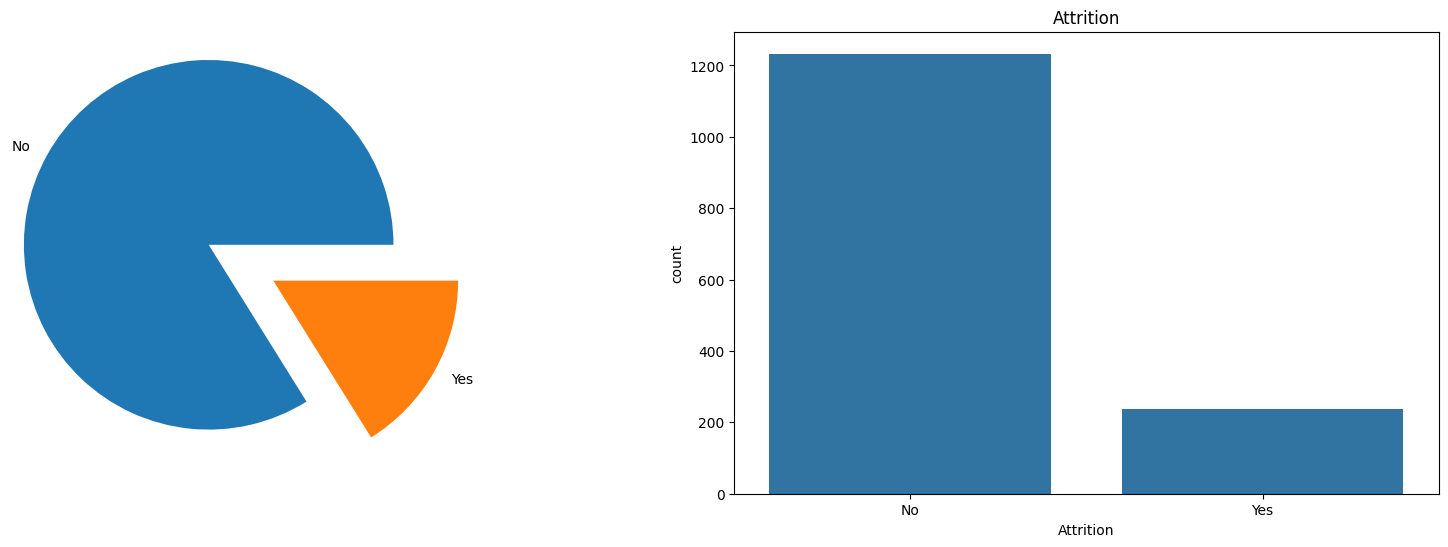

In [58]:
#Task4:
#Attrition column visual presentation
data = df["Attrition"].value_counts()                                   #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                         # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2], labels = labels)         # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["Attrition"], ax = ax[1], order = df["Attrition"].value_counts().index)
plt.title("Attrition")                                                  # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:The combined visualizations suggest that a majority of employees are satisfied with their employment and have not opted to leave the company.



BusinessTravel
Travel_Rarely        1054
Travel_Frequently     268
Non-Travel            148
Name: count, dtype: int64


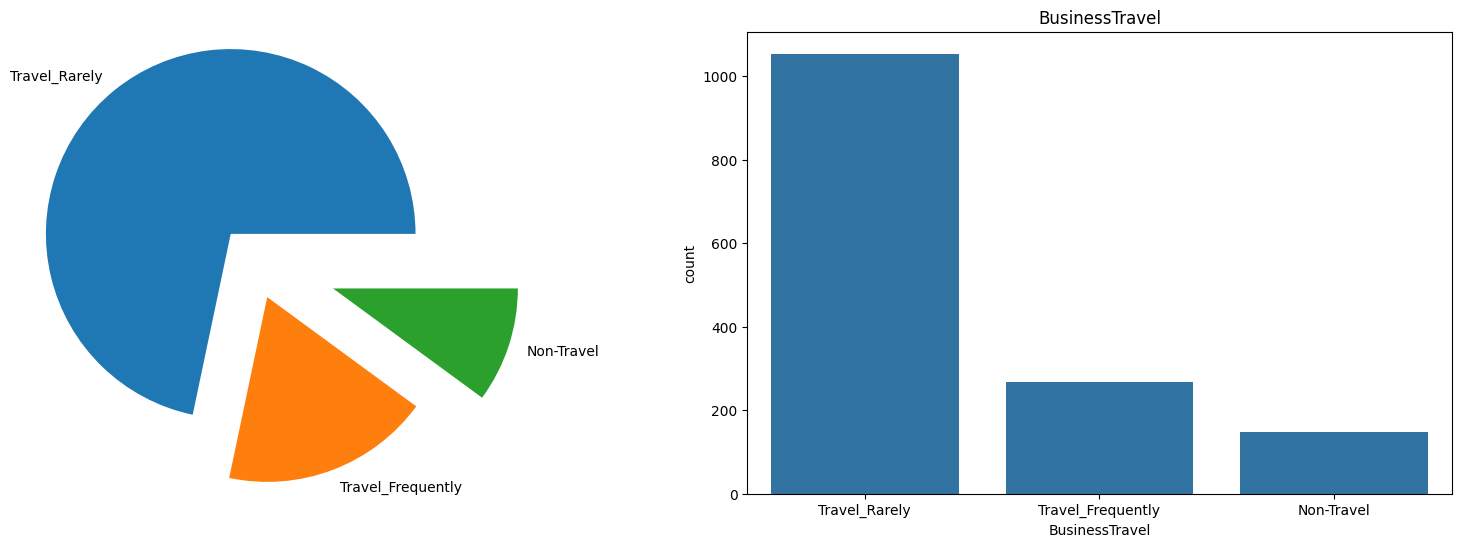

In [62]:
#Business_Travel column visual presentation:
data = df["BusinessTravel"].value_counts()                                           #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                                   # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2,  0.45], labels = labels)                            # pctdistance is the distance between the percentage on pie chart from center.
                                                                                      #  explode is to split the slices by the distance provided
sns.countplot(x = df["BusinessTravel"], ax = ax[1], order = df["BusinessTravel"].value_counts().index)
plt.title("BusinessTravel")                                                          # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:The combined visualizations suggest that the majority of employees in this dataset travel rarely for business purposes.

Department
Research & Development    961
Sales                     446
Human Resources            63
Name: count, dtype: int64


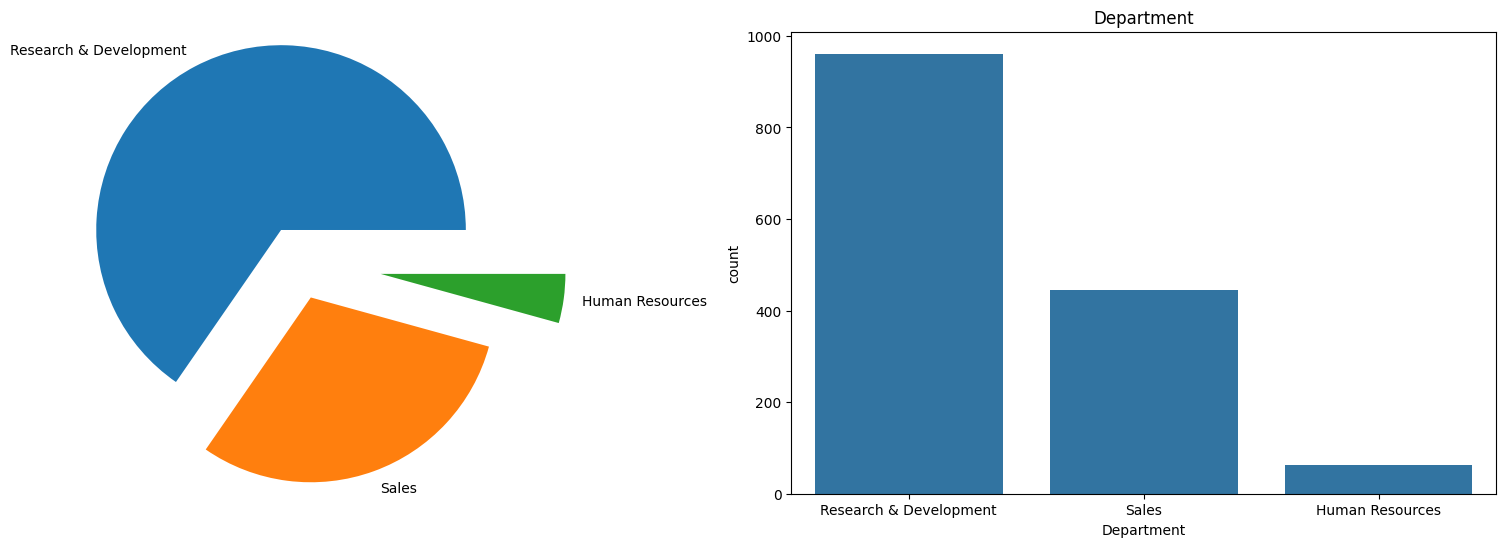

In [65]:
#Department column visualaization
data = df["Department"].value_counts()                                          #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2, 0.45], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["Department"], ax = ax[1], order = df["Department"].value_counts().index)
plt.title("Department")                                                         # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:It visually confirms the dominance of the Research & Development department, with a much higher number of employees.
#The Sales and Human Resources departments, while smaller, are still noticeable, indicating a diverse range of departments within the organization.



EducationField
Life Sciences       614
Medical             463
Marketing           155
Technical Degree    130
Other                81
Human Resources      27
Name: count, dtype: int64


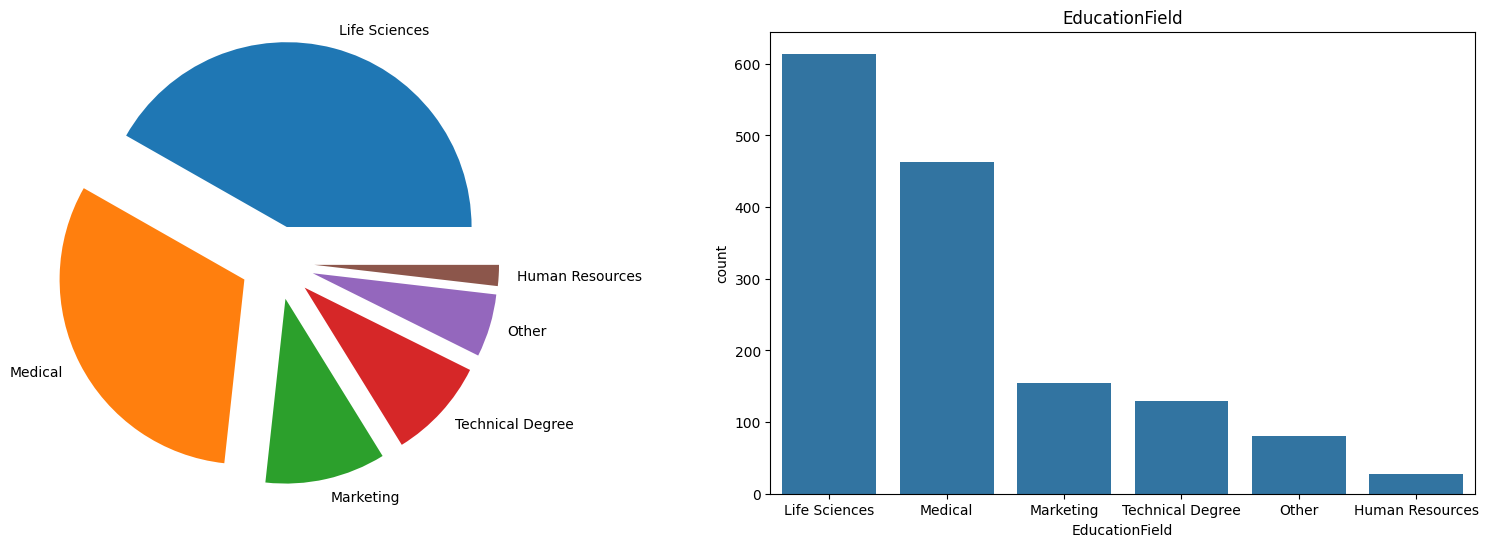

In [71]:
#EducationField visual presentation
data = df["EducationField"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.2, 0.2,0.2,0.2,0.2,0.2 ], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["EducationField"], ax = ax[1], order = df["EducationField"].value_counts().index)
plt.title("EducationField")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:It visually confirms the dominance of the Life Sciences field, with a much higher number of employees.
#The Medical, Marketing, and Technical Degree fields also have a significant number of employees, while the Other, Human Resources categories have relatively smaller counts.

EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: count, dtype: int64


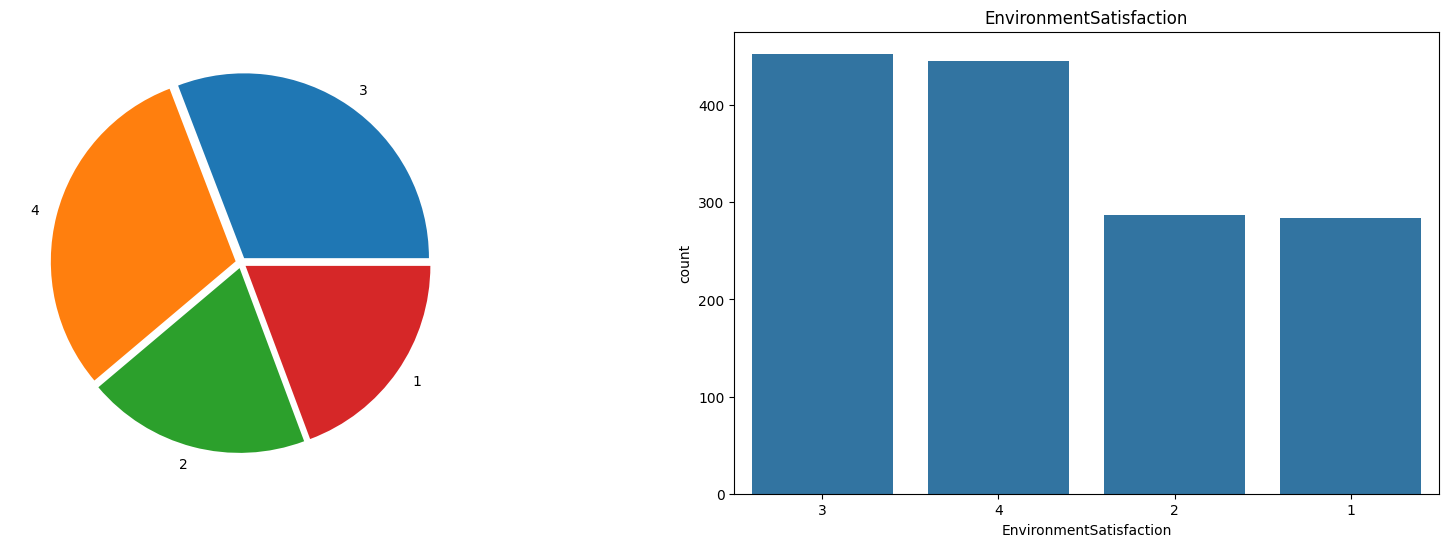

In [74]:
#EnvironmentSatisfaction column visual presentation
data = df["EnvironmentSatisfaction"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03,0.03,0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["EnvironmentSatisfaction"], ax = ax[1], order = df["EnvironmentSatisfaction"].value_counts().index)
plt.title("EnvironmentSatisfaction")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:It visually confirms the dominance of the 3 rating, with a much higher number of employees giving this rating.
#The 4, 2, and 1 ratings have relatively smaller counts, indicating a range of opinions on the work environment.

Gender
Male      894
Female    576
Name: count, dtype: int64


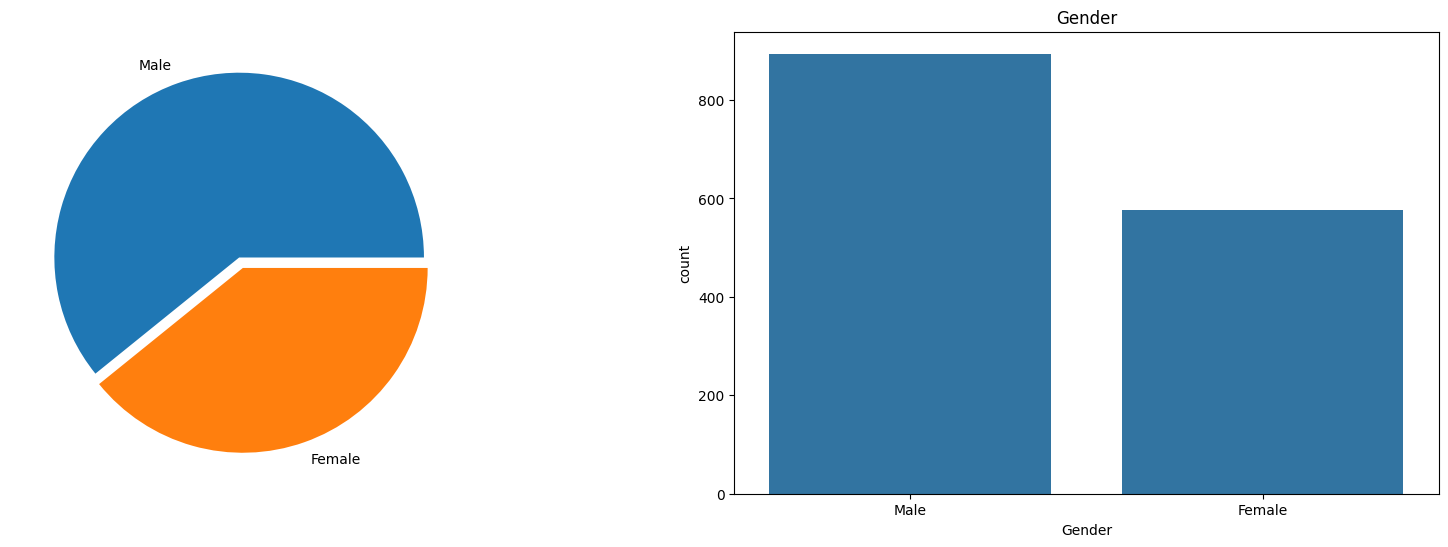

In [75]:
#Gender column visual presentation
data = df["Gender"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["Gender"], ax = ax[1], order = df["Gender"].value_counts().index)
plt.title("Gender")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:It visually confirms the dominance of the male category, with a much higher number of male employees.
#The female category, while smaller, is still noticeable, indicating that there are female employees in the organization.



MaritalStatus
Married     706
Single      449
Divorced    315
Name: count, dtype: int64


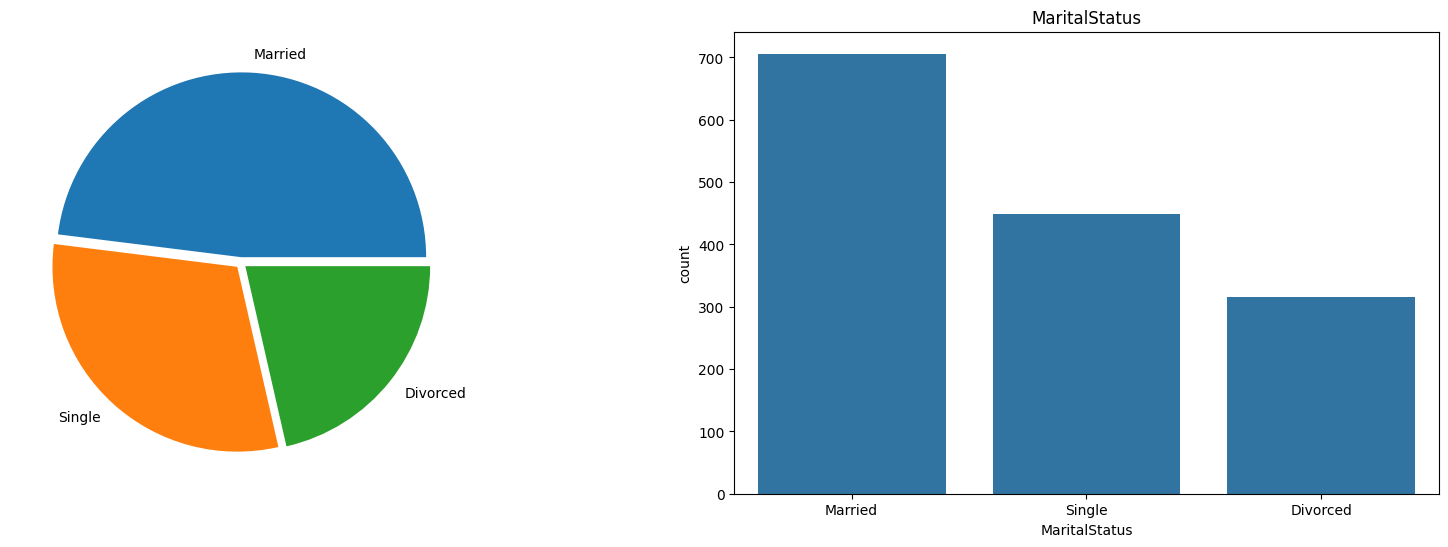

In [77]:
#MaritalStatus column visual presentation
data = df["MaritalStatus"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03,0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["MaritalStatus"], ax = ax[1], order = df["MaritalStatus"].value_counts().index)
plt.title("MaritalStatus")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:It visually confirms the dominance of the "Married" category, with a much higher number of married employees.
#The "Single" and "Divorced" categories, while smaller, are still noticeable, indicating a diversity of marital statuses within the organization.

OverTime
No     1054
Yes     416
Name: count, dtype: int64


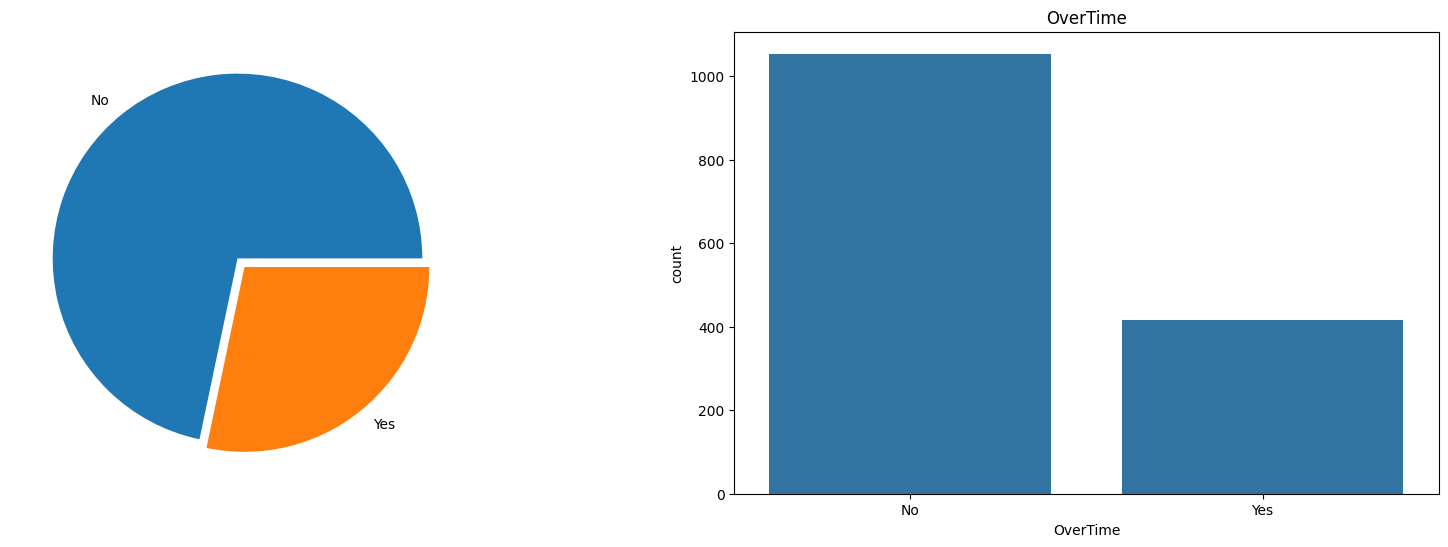

In [79]:
#OverTime column visual presentation
data = df["OverTime"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["OverTime"], ax = ax[1], order = df["OverTime"].value_counts().index)
plt.title("OverTime")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#interpretation:It visually confirms the dominance of the "No" category, with a much higher number of employees not working overtime.
#The "Yes" category, while smaller, is still noticeable, indicating that a portion of employees do work overtime.

PerformanceRating
3    1244
4     226
Name: count, dtype: int64


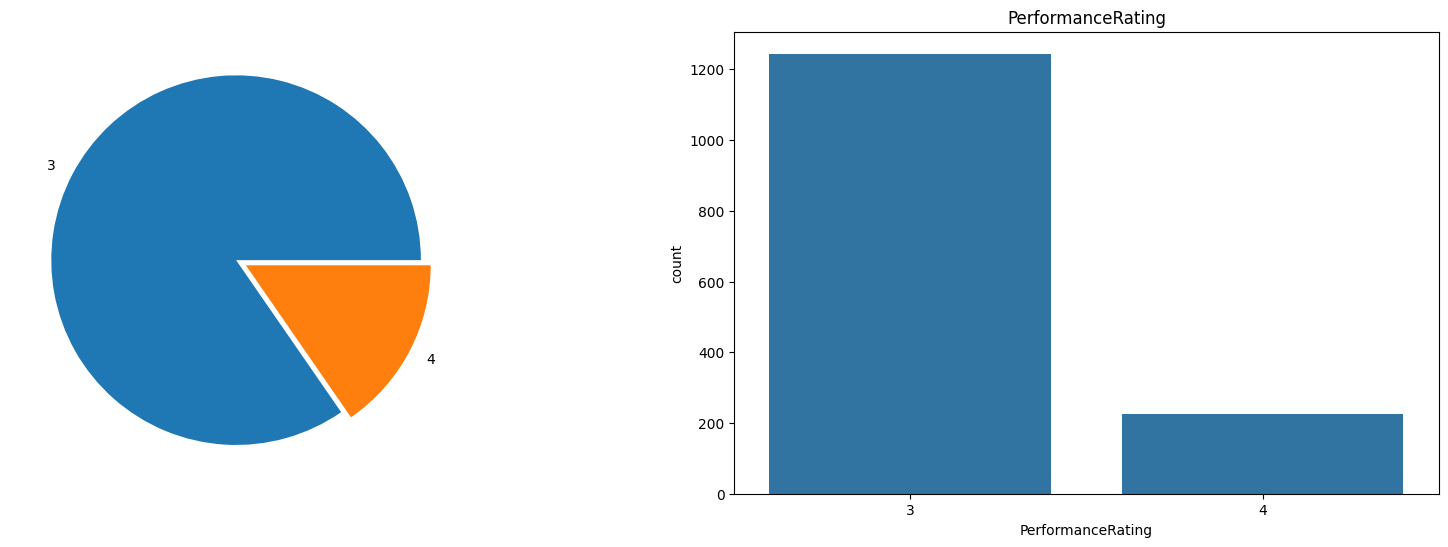

In [80]:
#PerformanceRating column visual presentation
data = df["PerformanceRating"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["PerformanceRating"], ax = ax[1], order = df["PerformanceRating"].value_counts().index)
plt.title("PerformanceRating")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:It visually confirms the dominance of the 3 rating, with a much higher number of employees receiving this rating.
#The 4 rating, while smaller, is still noticeable, indicating that a portion of employees received higher ratings.

WorkLifeBalance
3    893
2    344
4    153
1     80
Name: count, dtype: int64


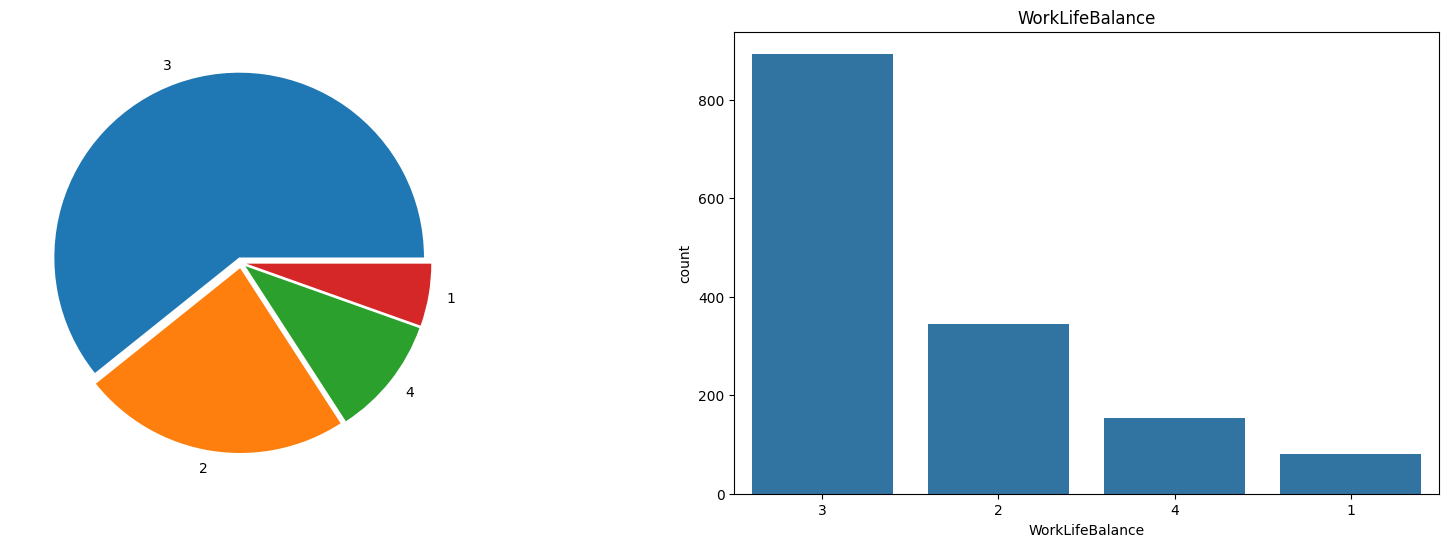

In [82]:
#WorkLifeBalance column visual presentation
data = df["WorkLifeBalance"].value_counts()                                       #value count is counting the number of values in the column
print(data)
pie, ax = plt.subplots(1, 2, figsize = [20,6])
labels =data.keys()                                                             # Keys returning you the index names in the data
ax[0].pie(x = data, explode = [0.03, 0.03,0.03,0.03], labels = labels)                      # pctdistance is the distance between the percentage on pie chart from center.
                                                                                #  explode is to split the slices by the distance provided
sns.countplot(x = df["WorkLifeBalance"], ax = ax[1], order = df["WorkLifeBalance"].value_counts().index)
plt.title("WorkLifeBalance")                                                     # title is used to prints the title on the image.
plt.show()

In [ ]:
#Interpretation:It visually confirms the dominance of the 3 rating, with a much higher number of employees giving this rating.
#The 2, 4, and 1 ratings have relatively smaller counts, indicating a range of opinions on work-life balance.

In [83]:
#Task5: for numerical columns
def info_of_numerical(col):
    print(f"The mean of the {col} is {df[col].mean()}")
    print(f"The median of the {col} is {df[col].median()}")
    print(f"The mode of the {col} is {df[col].mode()[0]}")
    print(f"The standard deviation of the {col} is {df[col].std()}")
    print(f"Number of missing values in the {col} is {df[col].isnull().sum()}")

In [84]:
info_of_numerical("EmployeeNumber")

The mean of the EmployeeNumber is 1024.865306122449
The median of the EmployeeNumber is 1020.5
The mode of the EmployeeNumber is 1
The standard deviation of the EmployeeNumber is 602.0243348474751
Number of missing values in the EmployeeNumber is 0


In [85]:
info_of_numerical("MonthlyIncome")

The mean of the MonthlyIncome is 6502.931292517007
The median of the MonthlyIncome is 4919.0
The mode of the MonthlyIncome is 2342
The standard deviation of the MonthlyIncome is 4707.956783097994
Number of missing values in the MonthlyIncome is 0


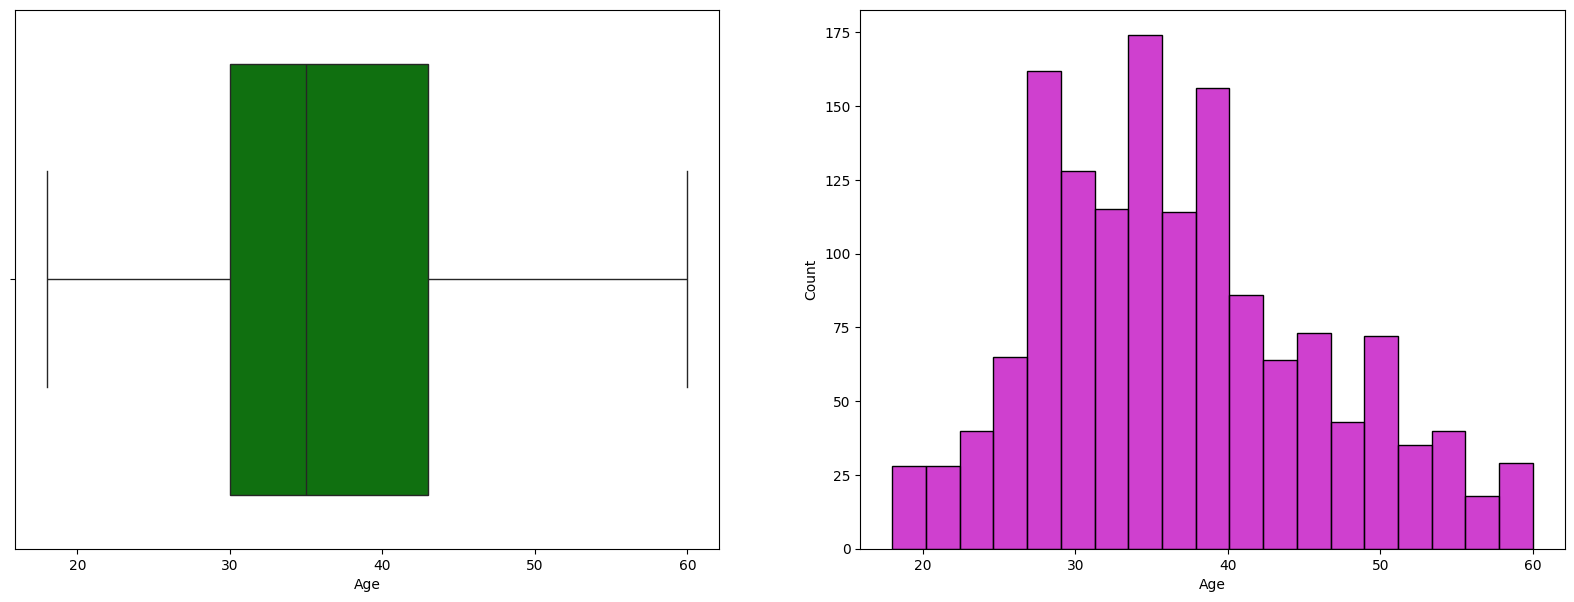

In [86]:
#Task6:
# Distribution of Age
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["Age"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["Age"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()


In [ ]:
#interpretation:It reveals a clear peak in the 30-35 age range, confirming the concentration of employees around this age.
#The distribution is somewhat skewed to the right, with a longer tail on the right side, indicating that there are some older employees in the dataset.

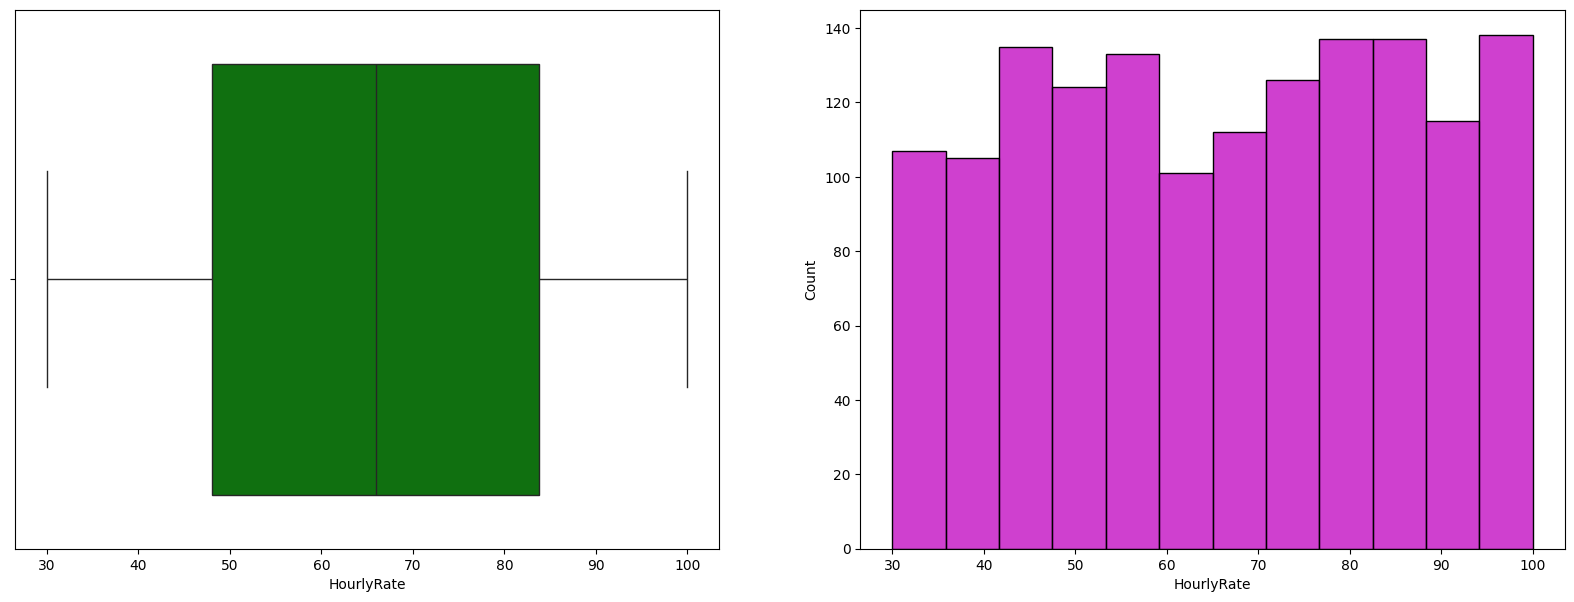

In [87]:
# Distribution of HourlyRate
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["HourlyRate"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["HourlyRate"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [ ]:
#interpretation:It reveals a clear peak in the 70-80 hourly rate range, confirming the concentration of employees around this rate.
#The distribution is somewhat skewed to the right, with a longer tail on the right side, indicating that there are some employees who earn significantly higher hourly rates.

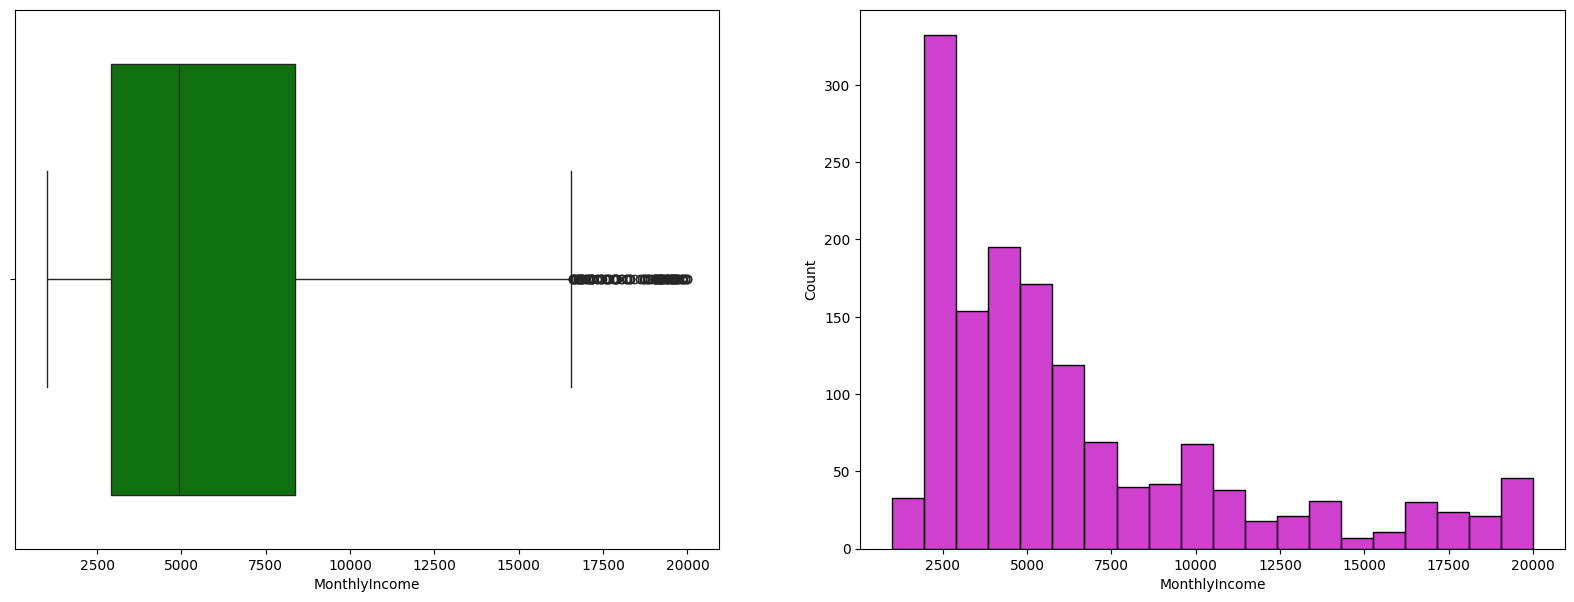

In [88]:
# Distribution of MonthlyIncome
fig, ax = plt.subplots(1, 2, figsize= (20, 7))               # Creating the space for the 2 images, first argument in subplots is rows and second is columns and the figure size
sns.histplot(x = df["MonthlyIncome"], ax =ax[1], color = "m") # ax[1] means image will plot at the second space
sns.boxplot(x = df["MonthlyIncome"], ax = ax[0], color = "g") # ax[0] means image will plot at the second space
plt.show()

In [ ]:
#interpretation:It reveals a clear peak in the 5,000-7,500 monthly income range, confirming the concentration of employees around this income level.
#The distribution is skewed to the right, with a longer tail on the right side, indicating that there are some employees who earn significantly higher monthly incomes.